## Ejercicios KNN Clasificacion

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
n = np.random.randint(0,2, size=1)
n[0]

1

In [64]:
altura = np.random.randint(150,170, size=15)
peso = np.random.randint(50,70, size=15)
talla = []
lista_talla = ['M','L']
for iterador in range(15):
    talla_azar = np.random.randint(0,2, size=1)
    talla.append(lista_talla[talla_azar[0]])

print(altura, len(altura))
print(talla, len(talla))
print(peso, len(peso))

[162 152 169 164 167 156 159 160 167 165 166 163 164 159 151] 15
['M', 'M', 'L', 'M', 'L', 'M', 'M', 'M', 'M', 'L', 'L', 'M', 'L', 'L', 'L'] 15
[69 51 54 60 69 64 62 56 57 55 57 69 50 52 57] 15


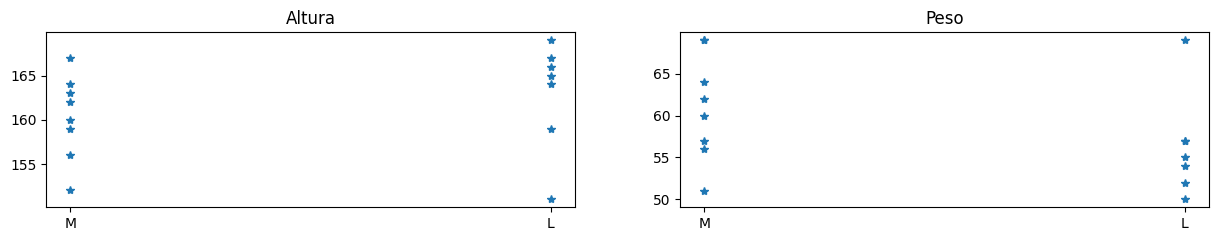

In [65]:
fig  = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.set_title('Altura')
ax1.plot(talla,altura, linewidth=0, marker = '*')
ax2.set_title('Peso')
ax2.plot(talla,peso, linewidth=0, marker = '*')
plt.show()

### Calculo de la similitud segun la funcion de distancias 
Aplicacion de la funcion de distancia euclidiana, __se utiliza cuando los datos son continuos__ al igual que la distancia manhattan
* Distancia --> __similitud__
Esto se usa para encontrar la similitud entre la nueva muestra y los casos de entrenaminto y luego encontrar los k vecinos más cercanos al nuevo en terminos de las variables [altura, peso]

* Nueva cliente: [altura: 161 cm, peso: 61 kg]

In [66]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

escalador = preprocessing.MinMaxScaler()

In [67]:
data_clientes = pd.DataFrame({'altura':altura, 'peso':peso, 'talla':talla})
data_clientes

,altura,peso,talla
0,162,69,M
1,152,51,M
2,169,54,L
3,164,60,M
4,167,69,L
5,156,64,M
6,159,62,M
7,160,56,M
8,167,57,M
9,165,55,L


In [68]:
talla_M = data_clientes[data_clientes['talla']=='M'] 
talla_L = data_clientes[data_clientes['talla']=='L'] 

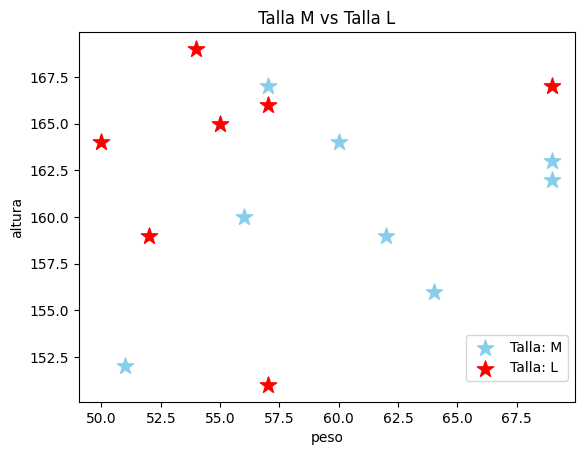

In [69]:
plt.scatter(talla_M['peso'], talla_M['altura'], marker='*', s=150, color= 'skyblue', label='Talla: M')
plt.scatter(talla_L['peso'], talla_L['altura'], marker='*', s=150, color= 'red', label='Talla: L')
plt.ylabel('altura')
plt.xlabel('peso')
plt.title('Talla M vs Talla L')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

In [70]:
datos = data_clientes[['altura', 'peso']]
talla = data_clientes['talla']
datos = escalador.fit_transform(datos)
datos

array([[0.61111111, 1.        ],
       [0.05555556, 0.05263158],
       [1.        , 0.21052632],
       [0.72222222, 0.52631579],
       [0.88888889, 1.        ],
       [0.27777778, 0.73684211],
       [0.44444444, 0.63157895],
       [0.5       , 0.31578947],
       [0.88888889, 0.36842105],
       [0.77777778, 0.26315789],
       [0.83333333, 0.36842105],
       [0.66666667, 1.        ],
       [0.72222222, 0.        ],
       [0.44444444, 0.10526316],
       [0.        , 0.36842105]])

In [71]:
clasificador = KNeighborsClassifier(n_neighbors =3)
clasificador.fit(datos, talla)

KNeighborsClassifier(n_neighbors=3)

In [72]:
altura_ = 161
peso_ = 61

## Escalamiento 
cliente_nuevo = escalador.transform([[altura_,peso_]])

## prediccion
talla = clasificador.predict(cliente_nuevo)
talla_probabilidad = clasificador.predict_proba(cliente_nuevo)
print(f'Talla {talla}')

Talla ['M']


c:\Users\USUARIO\Documents\Python Scripts\ML\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


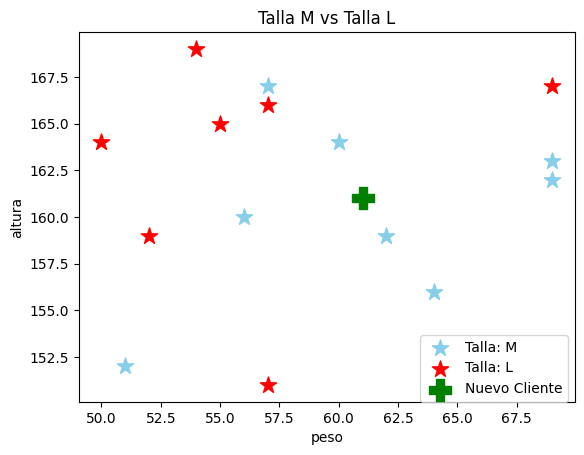

In [73]:
plt.scatter(talla_M['peso'], talla_M['altura'], marker='*', s=150, color= 'skyblue', label='Talla: M')
plt.scatter(talla_L['peso'], talla_L['altura'], marker='*', s=150, color= 'red', label='Talla: L')
plt.scatter(peso_, altura_, marker ='P', s=250,color='green', label = 'Nuevo Cliente')
plt.ylabel('altura')
plt.xlabel('peso')
plt.title('Talla M vs Talla L')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()